# core consistency demo

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base
import metrics
import seaborn
import utils

In [2]:
X = loadmat('datasets/aminoacids.mat')['X'][0][0]['data']
X = X/np.linalg.norm(X)
rank = 3
factors, result, initial_factors, log = cp.cp_opt(X, rank=3, method='cg', init='svd', gtol=1e-15)
#factors, result = cp.cp_als(X, rank=3, init='svd', convergence_th=1e-15, verbose=False)


A, B, C = factors
print(f'core consistency: {metrics.core_consistency(X,A,B,C)}')

core consistency: 99.83433344169195


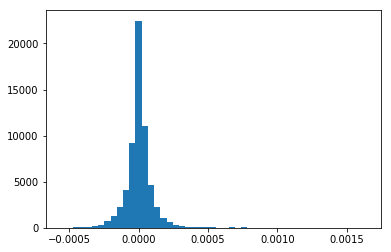

In [3]:
reconstructed_tensor = base.ktensor(*factors)
residuals = (X-reconstructed_tensor).ravel()

plt.hist(residuals, bins=np.linspace(residuals.min(), residuals.max(), 50))
plt.show()

In [4]:
num_max_components = 7
cc = metrics.calculate_core_consistencies(X, num_max_components)
print(cc)

[100.0, 99.99999999999943, 99.82263178378922, 57.81993256993889, -95137.85226912994, -1787339.2395000716, -1336536.945171447]


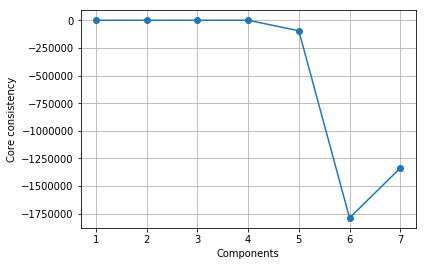

In [5]:
plt.plot(range(1,num_max_components+1), cc,'-o')
plt.grid()
plt.xlabel('Components')
plt.ylabel('Core consistency')
plt.show()

In [6]:
np.random.seed(0)
sizes = [10, 15, 20]
rank = 3

tensor, factors, norms, noise = utils.create_data(sizes, rank, noise_factor=0.2)

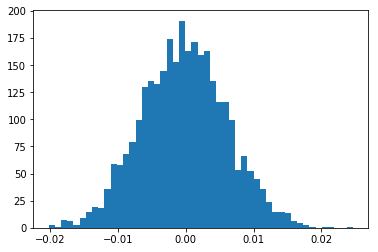

In [7]:
reconstructed_tensor = base.ktensor(*factors)
residuals = (tensor-reconstructed_tensor).ravel()

plt.hist(residuals, bins=np.linspace(residuals.min(), residuals.max(), 50))
plt.show()

[100.0, 99.99999999991992, 99.8574408968858, 58.46496464115175, -604378521.6491117]


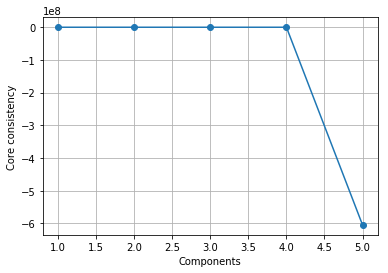

In [8]:
num_max_components = 5
cc = metrics.calculate_core_consistencies(X, num_max_components)
print(cc)
plt.plot(range(1,num_max_components+1), cc,'-o')
plt.grid()
plt.xlabel('Components')
plt.ylabel('Core consistency')
plt.show()